In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [4]:
 def plot_vector_field(ax=plt, fmax = 0.6):
    X, Y = np.meshgrid(np.arange(-10, 10, .3), np.arange(-10, 10, .3))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

ffff

In [5]:
# Goal
goal = [-7.425, -7.295, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[7.27, -7.75, .07], # Cylinder12
             [2.8, -4.85, .01], # Cylinder7
             [-5.8, -0.975, .02], # Cylinder11 1
             [4.4, 0.875, .01], # Cylinder6
             [2.42, 4.075, .07], # Cylinder5 1
             [0.52, 6.3, .001], # Cylinder8 1
             [-1.775, 2.1, 1], # Cylinder10 1
             [-5.12, 3.42, .02], # Cylinder9 1
             [7.425, 4.725, 2], # Cuboid1
             [2.725, 0.0, 2.5], # Cuboid0
             [-1.025,  -1.5, 2], # Cuboid3
             [-6.7, 6.4, 0.1], # Cuboid4
             [-5.15, -6.2, 0.7], # Cuboid6
              ]

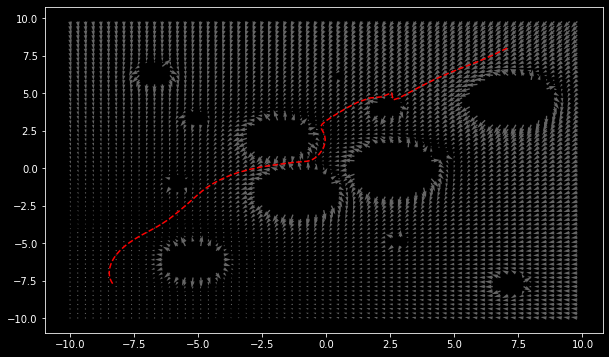

In [6]:
# Initial location of the robot
q = np.array((7.625, 8.55))


trajectory = simulate(q, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot_vector_field()